In [2]:
import sys
sys.path.append('/Users/vdk/GeneveWork/Code/calibpipe-main-calibpipe/')
from astropy.io import ascii
import numpy as np
import pandas as pd
import matplotlib
import csv
import scipy
import matplotlib.pyplot as plt
from seaborn import histplot
import random
import copy
from os import path, makedirs
from astropy.coordinates import SkyCoord
from astropy.table import Table
import astropy.units as u
from ctapipe.containers import MuonEfficiencyContainer
from ctapipe.coordinates import CameraFrame, TelescopeFrame
from ctapipe.io import EventSource, EventSeeker
from ctapipe.core import TelescopeComponent
from ctapipe.core.traits import (
    List,
    Int,
    FloatTelescopeParameter,
    TelescopeParameter,
    Unicode,
)
from ctapipe.image.cleaning import tailcuts_clean
from ctapipe.image.muon import MuonRingFitter, MuonIntensityFitter
from traitlets.config import Config
from ctapipe.image import ImageProcessor
from ctapipe.image.muon import MuonProcessor
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
from ctapipe.calib import CameraCalibrator
from traitlets.config.loader import Config, FileConfigLoader, JSONFileConfigLoader
import pathlib
from calibpipe.throughput import MuonCalibrator
from traitlets.config import Config
from astropy.time import Time
from astropy.coordinates import EarthLocation,SkyCoord, AltAz 
from traitlets.config import Config
import time
from ctapipe.image import number_of_island_sizes
from ctapipe.image import (
    hillas_parameters,
    leakage_parameters,
    concentration_parameters,
)
from ctapipe.image import timing_parameters
from ctapipe.image import number_of_islands
from ctapipe.image import camera_to_shower_coordinates
%matplotlib inline



In [68]:
telescope = 1
variances = []
arr_max_nsb = []

for nsb_scale in range(8,9):
    filename = f'/Users/vdk/output_dummy_scan_4Sept_3/Dummy100_nsb_scaling_factor_{nsb_scale}.simtel.gz'
    source = EventSource(filename, max_events=10)
    event_iterator = iter(source)
    temp_variances = []
    for i,event in enumerate(event_iterator):
        for k in range(len(event.r1.tel[telescope].waveform)):
            print(event.r1.tel[telescope].waveform[k])
            #print(event.r1.tel[telescope].waveform)
            temp_variances.append(np.var(event.r1.tel[telescope].waveform[k]))
        #for k in event.r1.tel[telescope].waveform:
        #    temp_variances.append(np.var(k.r1.tel[telescope].waveform))
        break


#print("len mean nsb = ", len(medium_nsb))
len(temp_variances)

[ 0.06619216 -0.02098743 -0.02098743  0.32773095 -0.01008998 -0.21714152
 -0.14085938 -0.10816703 -0.03188488 -0.10816703 -0.15175682 -0.23893642
  0.00080746 -0.04278233 -0.19534662 -0.3043211  -0.12996192  0.07708961
 -0.09726958 -0.14085938 -0.21714152 -0.06457723  0.10978196  0.207859
  0.01170491 -0.08637213 -0.21714152 -0.14085938  0.06619216  0.12067941
  0.28414115  0.3604233   0.14247431  0.2296539   0.42580798  0.13157685
 -0.11906448 -0.10816703 -0.02098743  0.03349981]
[-0.12105198 -0.131551   -0.10005396 -0.06855693 -0.19454506 -0.15254901
 -0.07905594 -0.01606187 -0.07905594 -0.08955495 -0.0475589   0.19391835
  0.4458946   0.48789066  0.20441735 -0.0475589   0.01543516  0.03643318
  0.02593417 -0.06855693 -0.14205    -0.03705989 -0.131551   -0.0475589
 -0.06855693 -0.06855693 -0.01606187  0.0574312   0.2674114   0.3409045
  0.0574312  -0.12105198 -0.10005396  0.12042527  0.19391835  0.2359144
  0.40389857  0.21491636 -0.00556286 -0.06855693]
[-0.08124675 -0.1635732  -0.0

[ 0.03672601 -0.10754582 -0.01876315 -0.14083931 -0.15193714 -0.02986099
 -0.17413281 -0.09644798 -0.29620898 -0.04095882 -0.08535015 -0.11864365
 -0.14083931 -0.20742631 -0.06315448 -0.14083931 -0.16303498 -0.10754582
 -0.06315448 -0.04095882  0.21429133  0.4029545   0.12550867 -0.04095882
 -0.06315448 -0.05205665  0.12550867  0.2031935   0.2697805   0.3363675
 -0.09644798 -0.08535015  0.02562818 -0.11864365 -0.09644798 -0.06315448
 -0.12974147 -0.17413281 -0.08535015 -0.08535015]
[-0.0560075   0.01729375  0.21625428 -0.01412107  0.03823696 -0.01412107
 -0.0560075   0.03823696 -0.03506429 -0.20260999 -0.0560075  -0.13978036
 -0.15025195  0.06965178 -0.0560075   0.03823696 -0.15025195 -0.31779766
 -0.17119518 -0.09789392  0.12200981  0.08012339  0.38379997  0.37332836
  0.02776535  0.05918017 -0.03506429 -0.00364947 -0.0560075  -0.16072357
 -0.07695071 -0.09789392  0.04870857  0.14295302  0.32097033  0.22672588
  0.02776535  0.28955552  0.2790839   0.22672588]
[ 0.36049354  0.03742688 

1855

In [53]:
telescope = 1

variances = []
arr_max_nsb = []

for nsb_scale in range(8,9):
    filename = f'/Users/vdk/output_dummy_scan_4Sept_3/Dummy100_nsb_scaling_factor_{nsb_scale}.simtel.gz'
    source = EventSource(filename, max_events=10)
    event_iterator = iter(source)
    temp_variances = []
    for i,event in enumerate(event_iterator):
        for pixel in event.r1.tel[1].waveform:
            arr_max_nsb.append(np.max(pixel))
        #for k in range(len(j.r1.tel[telescope].waveform)):
        #    temp_variances.append(np.var(j.r1.tel[telescope].waveform[k]))
        break
    #     medium_nsb.append(np.mean(j.r1.tel[telescope].waveform))
    #     sum_nsb.append(np.sum(j.r1.tel[telescope].waveform)) 
    #     max_nsb.append(np.max(j.r1.tel[telescope].waveform))
        
    #     r0_medium_nsb.append(np.mean(j.r0.tel[telescope].waveform[0]))
    #     r0_sum_nsb.append(np.sum(j.r0.tel[telescope].waveform[0]))
    #     r0_max_nsb.append(np.max(j.r0.tel[telescope].waveform[0]))


print("len mean nsb = ", len(medium_nsb))

len mean nsb =  0


0.044715934

5.9634976
len =  18550
6.286682
7.2205586


Text(0, 0.5, 'Probability density')

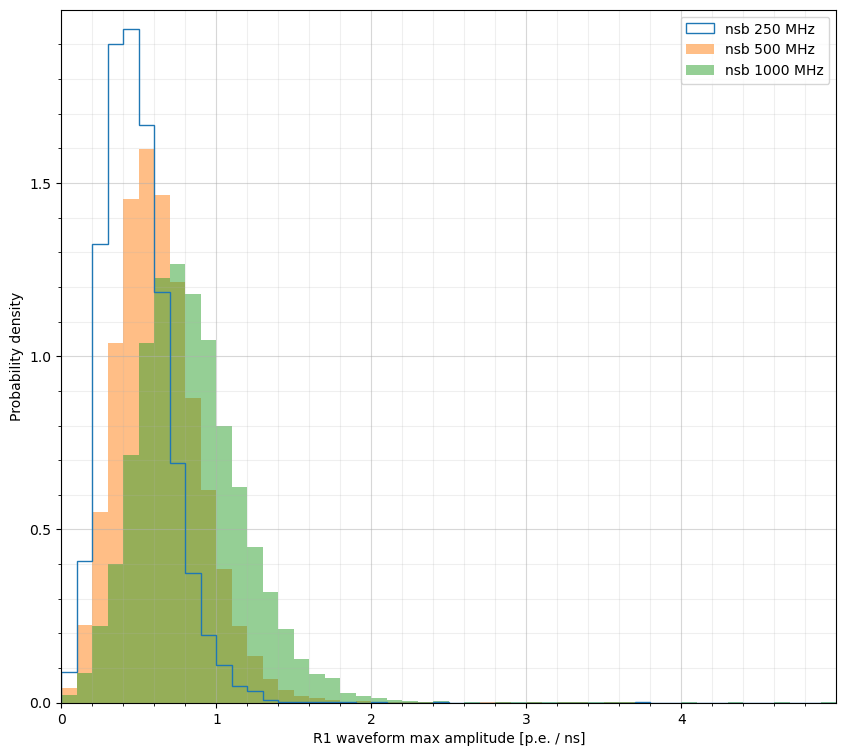

In [70]:
nsb_scale = 10
filename = f'/Users/vdk/output_dummy_scan_4Sept_3/Dummy100_nsb_scaling_factor_{nsb_scale}.simtel.gz'
source = EventSource(filename, max_events=10)
event_iterator = iter(source)
arr_max_nsb = []

for event in event_iterator:
    for pixel in event.r1.tel[1].waveform:
        arr_max_nsb.append(np.max(pixel))

fig = plt.figure(figsize = (10,9))
ax = fig.add_subplot(1,1,1)
print(max(arr_max_nsb))

x,y,_ = ax.hist(arr_max_nsb, bins = 100, range = (0,10), density = True, histtype = 'step', alpha = 1, label = 'nsb 250 MHz')
nsb_scale = 20
filename = f'/Users/vdk/output_dummy_scan_4Sept_3/Dummy100_nsb_scaling_factor_{nsb_scale}.simtel.gz'
source = EventSource(filename, max_events=10)
event_iterator = iter(source)
arr_max_nsb = []

for event in event_iterator:
    for pixel in event.r1.tel[1].waveform:
        arr_max_nsb.append(np.max(pixel))
print("len = ", len(arr_max_nsb))
x,y,_ = plt.hist(arr_max_nsb, bins = 100, range = (0,10), density = True, alpha = 0.5, label = 'nsb 500 MHz')
print(max(arr_max_nsb))

nsb_scale = 40
filename = f'/Users/vdk/output_dummy_scan_4Sept_3/Dummy100_nsb_scaling_factor_{nsb_scale}.simtel.gz'
source = EventSource(filename, max_events=10)
event_iterator = iter(source)
arr_max_nsb = []

for event in event_iterator:
    for pixel in event.r1.tel[1].waveform:
        arr_max_nsb.append(np.max(pixel))

x,y,_ = plt.hist(arr_max_nsb, bins = 100, range = (0,10), density = True, alpha = 0.5, label = 'nsb 1000 MHz')
print(max(arr_max_nsb))

plt.legend()
ax.set_xlim(0, 5)
ax.set_ylim(0, 2)

major_ticks_x = np.arange(0, 5, 1)
minor_ticks_x = np.arange(0, 5, 0.2)
major_ticks_y = np.arange(0, 2, 0.5)
minor_ticks_y = np.arange(0, 2, 0.1)

ax.set_xticks(major_ticks_x)
ax.set_xticks(minor_ticks_x, minor=True)
ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.xlabel("R1 waveform max amplitude [p.e. / ns]")
plt.ylabel("Probability density")
#plt.grid()

In [32]:
np.mean(arr_max_nsb)*2

1.6901757717132568

In [3]:
#filename = '/Users/vdk/MST_work/data_muons/mono_proton_simtel/proton_20deg_0deg_run2___cta-prod6-paranal-2147m-Paranal-nshow-3000-0-LSTs-1-MSTs-0-SSTs-NSCAT_5_CSCAT_300_EMIN_1_EMAX_200_after_muontag.simtel.zst'
#filename = '/Users/vdk/MST_work/data_muons/mono_muon_simtel/muon_20deg_0deg_run0___cta-prod6-paranal-2147m-Paranal-0-LSTs-1-MSTs-0-SSTs-NSCAT_1_CSCAT_8_EMIN_0.005_EMAX_1_FIXCHI_600_VIEWCONE_3_after_muontag.simtel.zst'
filename = '/fefs/aswg/workspace/vadym.voitsekhovskyi/simrunner_output/output_dummy/Dummy100.simtel.gz'
source = EventSource(filename, max_events=9000)
event_iterator = iter(source)



for i,j in enumerate(event_iterator):
    if i == 1:
        telescope = 1
        event = j
        image_processor = ImageProcessor(source.subarray)
        muon_processor = MuonProcessor(source.subarray)
        calib = CameraCalibrator(
                image_extractor_type="GlobalPeakWindowSum",
                subarray = source.subarray)
        calib(j)
        image_processor(j)
        muon_processor(j)
        fig, axes = plt.subplots(2, 1, sharex=False, gridspec_kw={'height_ratios': [1, 1]}, figsize=(9,12))
        fig.subplots_adjust(hspace=0.2)
        ax = axes[0]
        camgeom = source.subarray.tel[telescope].camera.geometry
        title="TrueImage run {} if {} fit {} width {}".format(j.index.obs_id, j.index.event_id, round(j.muon.tel[telescope].efficiency.optical_efficiency, 3), round(j.muon.tel[telescope].efficiency.width.to_value(),3))
        disp = CameraDisplay(camgeom,title=title, ax = ax)
        disp.image = j.simulation.tel[telescope].true_image #.sum(axis=1)
        #disp.image = event.dl1.tel[1].image
        disp.cmap = plt.cm.RdBu_r
        disp.add_colorbar()
        disp.set_limits_percent(95)
        bx = axes[1]
        for pix_id in range(0,1764):
            bx.plot(j.r0.tel[telescope].waveform[0][pix_id], label="pix {}".format(pix_id), drawstyle='steps')
        bx.set_ylabel("ADC counts")
        bx.set_xlabel("Samples")
        bx.set_title("Waveforms")
        plt.show()
        #plt.savefig(f"/Users/vdk/MST_ProtonImages_NewQualityCheck/TrueImage+Waveform_mstPROTON_event{j.index.event_id}_obs{j.index.obs_id}_numer{i}")
        #plt.savefig(f"/Users/vdk/TrueImage+Waveform_mstMUON_event{j.index.event_id}_obs{j.index.obs_id}")
        break
        #if i == 150:
        #    break

plt.close()

KeyboardInterrupt: 

In [ ]:
filename = '/fefs/aswg/workspace/vadym.voitsekhovskyi/simrunner_output/output_dummy/Dummy100.simtel.gz'
source = EventSource(filename, max_events=9000)
event_iterator = iter(source)

In [ ]:
event = next(event_iterator)

In [ ]:
event

In [ ]:
event.r1.tel[1].waveform

In [ ]:
event = next(event_iterator)

In [ ]:
plt.figure(figsize = (9,6))
camgeom = source.subarray.tel[1].camera.geometry
#title=f"Event_{i}_optEff{round(event_container[i].muon.tel[m].efficiency.optical_efficiency,3)}_width{round(event_container[i].muon.tel[m].efficiency.width.to_value(),3)}_triggercount{len(event_container[i].trigger.tel.keys())}"
#title=f"CleanedRing_{i}_optEff{round(event_container[i].muon.tel[m].efficiency.optical_efficiency,3)}_width{round(event_container[i].muon.tel[m].efficiency.width.to_value(),3)}_triggeredTel{m}"
title = '1'
disp = CameraDisplay(camgeom,title=title)
#disp.image = event_container[i].simulation.tel[m].true_image
disp.image = event.r1.tel[1].waveform.sum(axis=1)
disp.cmap = plt.cm.RdBu_r
disp.add_colorbar()
disp.set_limits_percent(95)

In [3]:
#filename = '/Users/vdk/MST_work/data_muons/mono_proton_simtel/proton_20deg_0deg_run2___cta-prod6-paranal-2147m-Paranal-nshow-3000-0-LSTs-1-MSTs-0-SSTs-NSCAT_5_CSCAT_300_EMIN_1_EMAX_200_after_muontag.simtel.zst'
#filename = '/Users/vdk/MST_work/data_muons/mono_muon_simtel/muon_20deg_0deg_run0___cta-prod6-paranal-2147m-Paranal-0-LSTs-1-MSTs-0-SSTs-NSCAT_1_CSCAT_8_EMIN_0.005_EMAX_1_FIXCHI_600_VIEWCONE_3_after_muontag.simtel.zst'

telescope = 1
medium_nsb = []
sum_nsb = []
max_nsb = []
r0_medium_nsb = []
r0_sum_nsb = []
r0_max_nsb = []

for nsb_scale in range(1,175):
    #filename = f'/fefs/aswg/workspace/vadym.voitsekhovskyi/simrunner_output/output_dummy_scan_1Sept/Dummy100_nsb_scaling_factor_{nsb_scale}.simtel.gz'
    filename = f'/fefs/aswg/workspace/vadym.voitsekhovskyi/simrunner_output/output_dummy_scan_4Sept_3/Dummy100_nsb_scaling_factor_{nsb_scale}.simtel.gz'
    source = EventSource(filename, max_events=9000)
    event_iterator = iter(source)
    for i,j in enumerate(event_iterator):
        if i == 1:
            medium_nsb.append(np.mean(j.r1.tel[telescope].waveform))
            sum_nsb.append(np.sum(j.r1.tel[telescope].waveform)) 
            max_nsb.append(np.max(j.r1.tel[telescope].waveform))
            r0_medium_nsb.append(np.mean(j.r0.tel[telescope].waveform[0]))
            r0_sum_nsb.append(np.sum(j.r0.tel[telescope].waveform[0]))
            r0_max_nsb.append(np.max(j.r0.tel[telescope].waveform[0]))
            telescope = 1
            event = j
            #image_processor = ImageProcessor(source.subarray)
            #muon_processor = MuonProcessor(source.subarray)
            #calib = CameraCalibrator(image_extractor_type="GlobalPeakWindowSum",subarray = source.subarray)
            #fig, axes = plt.subplots(2, 1, sharex=False, gridspec_kw={'height_ratios': [1, 1]}, figsize=(9,12))
            #fig.subplots_adjust(hspace=0.2)
            #ax = axes[0]
            #camgeom = source.subarray.tel[telescope].camera.geometry
            #title="TrueImage run {} if {} fit {} width {}".format(j.index.obs_id, j.index.event_id, round(j.muon.tel[telescope].efficiency.optical_efficiency, 3), round(j.muon.tel[telescope].efficiency.width.to_value(),3))
            #title = f"NSB_scale = {nsb_scale}"
            #disp = CameraDisplay(camgeom,title=title, ax = ax)
            
            #disp.image = j.r1.tel[telescope].waveform.sum(axis=1)
            #disp.image = event.dl1.tel[1].image
            #disp.cmap = plt.cm.RdBu_r
            #disp.add_colorbar()
            #disp.set_limits_percent(95)
            #bx = axes[1]
            plt.figure()
            plt.grid()
            for pix_id in range(0,1855):
                #bx.plot(j.r1.tel[telescope].waveform[pix_id], label="pix {}".format(pix_id), drawstyle='steps')
                plt.plot(j.r1.tel[telescope].waveform[pix_id], label="pix {}".format(pix_id), drawstyle='steps')
            #bx.set_ylabel("ADC counts")
            #bx.set_xlabel("Samples")
            #bx.set_title("Waveforms")
            #bx.set_ylim(-2, 9)
            plt.ylabel("ADC counts")
            plt.xlabel("Samples")
            plt.title(f"NSB_scale = {nsb_scale}")
            plt.ylim(-5, 9)            
            #plt.show()
            #plt.savefig(f"/Users/vdk/MST_ProtonImages_NewQualityCheck/TrueImage+Waveform_mstPROTON_event{j.index.event_id}_obs{j.index.obs_id}_numer{i}")
            plt.savefig(f"/fefs/aswg/workspace/vadym.voitsekhovskyi/LST_images_Waveform/NSB_r1_waveforms_1event_nsb10timesless_nsbscale_{nsb_scale}")
            plt.close()
            #if i == 150:
            #    break



In [5]:
#filename = '/Users/vdk/MST_work/data_muons/mono_proton_simtel/proton_20deg_0deg_run2___cta-prod6-paranal-2147m-Paranal-nshow-3000-0-LSTs-1-MSTs-0-SSTs-NSCAT_5_CSCAT_300_EMIN_1_EMAX_200_after_muontag.simtel.zst'
#filename = '/Users/vdk/MST_work/data_muons/mono_muon_simtel/muon_20deg_0deg_run0___cta-prod6-paranal-2147m-Paranal-0-LSTs-1-MSTs-0-SSTs-NSCAT_1_CSCAT_8_EMIN_0.005_EMAX_1_FIXCHI_600_VIEWCONE_3_after_muontag.simtel.zst'

medium_nsb = []
sum_nsb = []
max_nsb = []
r0_medium_nsb = []
r0_sum_nsb = []
r0_max_nsb = []
telescope = 1

variances = []
#for nsb_scale in range(1,18):
#for nsb_scale in range(1,101):
for nsb_scale in range(40,41):
    #filename = f'/fefs/aswg/workspace/vadym.voitsekhovskyi/simrunner_output/output_dummy_scan_1Sept/Dummy100_nsb_scaling_factor_{nsb_scale}.simtel.gz'
    #filename = f'/fefs/aswg/workspace/vadym.voitsekhovskyi/simrunner_output/output_dummy_scan_4Sept_2/Dummy100_nsb_scaling_factor_{nsb_scale}.simtel.gz'
    filename = f'/fefs/aswg/workspace/vadym.voitsekhovskyi/simrunner_output/output_dummy_scan_4Sept_3/Dummy100_nsb_scaling_factor_{nsb_scale}.simtel.gz'
    source = EventSource(filename, max_events=9000)
    event_iterator = iter(source)
    for i,j in enumerate(event_iterator):
        if i == 1:
            for k in range(len(j.r1.tel[telescope].waveform)):
                variances.append(np.var(j.r1.tel[telescope].waveform[k]))
            break
    #     medium_nsb.append(np.mean(j.r1.tel[telescope].waveform))
    #     sum_nsb.append(np.sum(j.r1.tel[telescope].waveform)) 
    #     max_nsb.append(np.max(j.r1.tel[telescope].waveform))
        
    #     r0_medium_nsb.append(np.mean(j.r0.tel[telescope].waveform[0]))
    #     r0_sum_nsb.append(np.sum(j.r0.tel[telescope].waveform[0]))
    #     r0_max_nsb.append(np.max(j.r0.tel[telescope].waveform[0]))


print("len mean nsb = ", len(medium_nsb))

len mean nsb =  0


In [7]:
np.mean(variances)

0.13244145

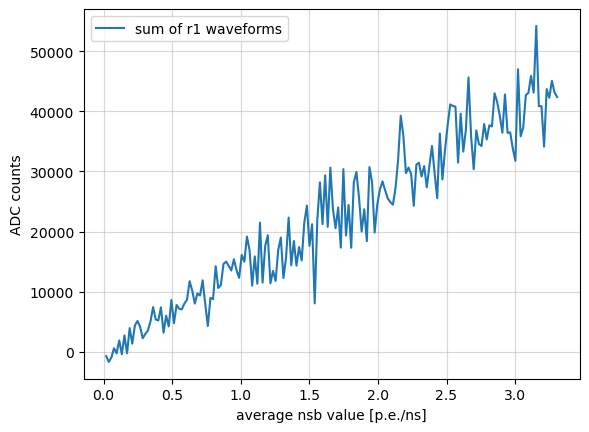

In [43]:
scale = [i for i in range(1,100)]
scale = [i for i in range(1,175)]
sum_nsb_full = []
for i in scale:
    sum_nsb_full.append(np.sum(sum_nsb[(i-1)*100:i*100]))
#pe_scale = [i*0.189 for i in scale]
pe_scale = [i*0.019 for i in scale] # Average night sky background of telescope 1: 0.019 p.e./ns (DC current: 0.12 uA)
#sum_nsb_full = [np.sum(sum_nsb[(i-1)*100:i*100] for i in scale)]
plt.grid(alpha = 0.5)
plt.xlabel("average nsb value [p.e./ns]")
plt.ylabel("ADC counts")
plt.plot(pe_scale, sum_nsb_full, label = "sum of r1 waveforms")
##plt.plot(pe_scale, medium_nsb, label = "mean of r1 waveforms")
plt.legend()

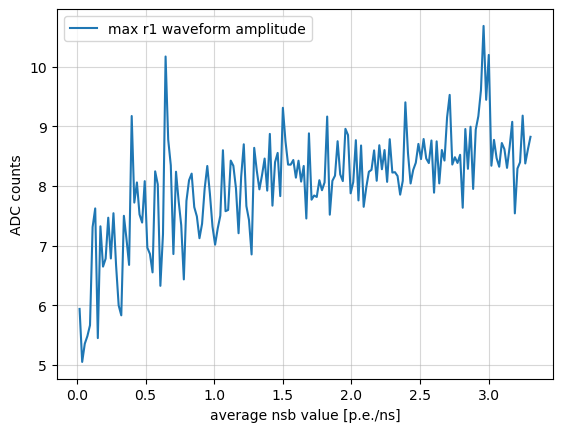

In [44]:
pe_scale = [i*0.019 for i in scale]
max_nsb_full = []
for i in scale:
    max_nsb_full.append(np.max(max_nsb[(i-1)*100:i*100]))
plt.plot(pe_scale, max_nsb_full,  label = "max r1 waveform amplitude")
plt.grid(alpha = 0.5)
plt.xlabel("average nsb value [p.e./ns]")
plt.ylabel("ADC counts")
plt.legend()

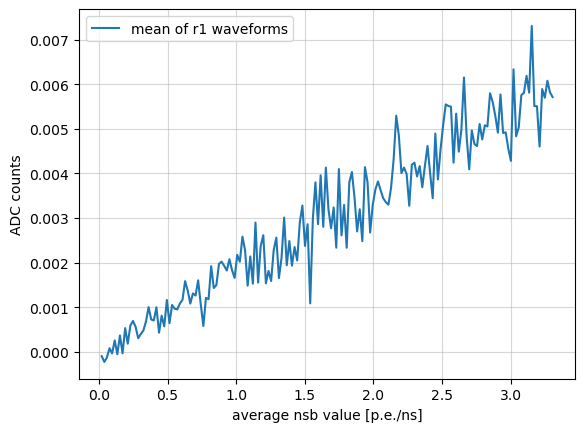

In [45]:
mean_nsb_full = []
for i in scale:
    mean_nsb_full.append(np.mean(medium_nsb[(i-1)*100:i*100]))
pe_scale = [i*0.019 for i in scale]
#sum_nsb_full = [np.sum(sum_nsb[(i-1)*100:i*100] for i in scale)]
plt.grid(alpha = 0.5)
plt.xlabel("average nsb value [p.e./ns]")
plt.ylabel("ADC counts")
plt.plot(pe_scale, mean_nsb_full, label = "mean of r1 waveforms")
#plt.plot(pe_scale, medium_nsb, label = "mean of r1 waveforms")
plt.legend()

<Axes: ylabel='Count'>

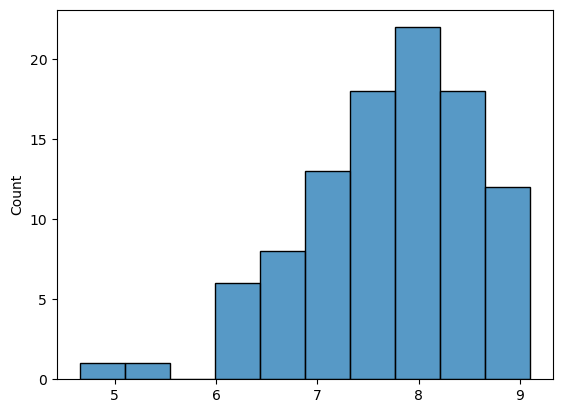

In [38]:
#histplot(event.r1.tel[1].waveform, bins = 30)
histplot(max_nsb_full, bins = 10)


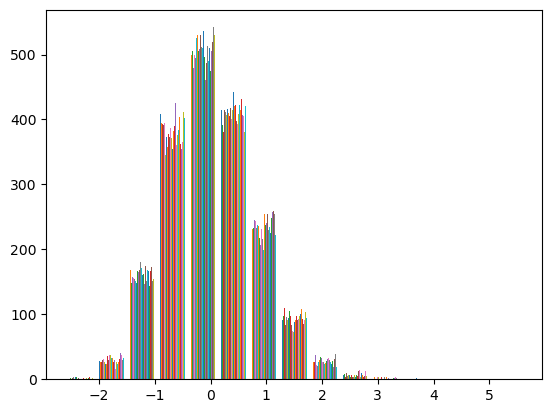

In [10]:
x,y, _ = plt.hist(event.r1.tel[1].waveform, bins = 15)

In [ ]:
scale = [i for i in range(1,18)]
pe_scale = [i*0.189 for i in scale]
plt.grid(alpha = 0.5)
plt.xlabel("average nsb value [p.e./ns]")
plt.ylabel("ADC counts")
plt.plot(pe_scale, r0_sum_nsb, label = "sum of r1 waveforms")
plt.plot(pe_scale, r0_medium_nsb, label = "mean of r1 waveforms")
plt.legend()

In [ ]:
pe_scale = [i*0.189 for i in scale]
plt.plot(pe_scale, r0_max_nsb,  label = "max r1 waveform amplitude")
plt.grid(alpha = 0.5)
plt.xlabel("average nsb value [p.e./ns]")
plt.ylabel("ADC counts")
plt.legend()

In [ ]:
test = [np.sum(sum_nsb[(i-1)*100:(i-1)*100] for i in scale)]

In [ ]:
np.sum(sum_nsb[100:200])

In [ ]:
for i in scale:
    #print((i-1)*100)
    #print(i*100)
    print(np.sum(sum_nsb[(i-1)*100:i*100]))

In [ ]:
np.max(j.r1.tel[telescope].waveform)

In [6]:
for nsb_scale in range(8,41):
    #filename = f'/fefs/aswg/workspace/vadym.voitsekhovskyi/simrunner_output/output_dummy_scan_1Sept/Dummy100_nsb_scaling_factor_{nsb_scale}.simtel.gz'
    filename = f'/fefs/aswg/workspace/vadym.voitsekhovskyi/simrunner_output/output_dummy_scan_4Sept_3/Dummy100_nsb_scaling_factor_{nsb_scale}.simtel.gz'
    source = EventSource(filename, max_events=9000)
    event_iterator = iter(source)
    for i,j in enumerate(event_iterator):
        if i == 1:
            telescope = 1
            event = j
            #image_processor = ImageProcessor(source.subarray)
            #muon_processor = MuonProcessor(source.subarray)
            #calib = CameraCalibrator(image_extractor_type="GlobalPeakWindowSum",subarray = source.subarray)
            #fig, axes = plt.subplots(2, 1, sharex=False, gridspec_kw={'height_ratios': [1, 1]}, figsize=(9,12))
            #fig.subplots_adjust(hspace=0.2)
            #ax = axes[0]
            #camgeom = source.subarray.tel[telescope].camera.geometry
            #title="TrueImage run {} if {} fit {} width {}".format(j.index.obs_id, j.index.event_id, round(j.muon.tel[telescope].efficiency.optical_efficiency, 3), round(j.muon.tel[telescope].efficiency.width.to_value(),3))
            #title = f"NSB_scale = {nsb_scale}"
            #disp = CameraDisplay(camgeom,title=title, ax = ax)
            
            #disp.image = j.r1.tel[telescope].waveform.sum(axis=1)
            #disp.image = event.dl1.tel[1].image
            #disp.cmap = plt.cm.RdBu_r
            #disp.add_colorbar()
            #disp.set_limits_percent(95)
            #bx = axes[1]
            plt.figure()
            plt.grid()
            for pix_id in range(0,1855):
                #bx.plot(j.r1.tel[telescope].waveform[pix_id], label="pix {}".format(pix_id), drawstyle='steps')
                plt.plot(j.r1.tel[telescope].waveform[pix_id], label="pix {}".format(pix_id), drawstyle='steps')
            #bx.set_ylabel("ADC counts")
            #bx.set_xlabel("Samples")
            #bx.set_title("Waveforms")
            #bx.set_ylim(-2, 9)
            plt.ylabel("ADC counts")
            plt.xlabel("Samples")
            plt.title(f"R1 waveforms for NSB value = {nsb_scale*25} MHz")
            plt.ylim(-5, 9)            
            #plt.show()
            #plt.savefig(f"/Users/vdk/MST_ProtonImages_NewQualityCheck/TrueImage+Waveform_mstPROTON_event{j.index.event_id}_obs{j.index.obs_id}_numer{i}")
            plt.savefig(f"/fefs/aswg/workspace/vadym.voitsekhovskyi/LST_images_Waveforms_required/NSB_r1_waveforms_1event_nsb10timesless_nsbscale_{nsb_scale}")
            plt.close()

In [31]:
nsb_scale = 10
filename = f'/fefs/aswg/workspace/vadym.voitsekhovskyi/simrunner_output/output_dummy_scan_4Sept_3/Dummy100_nsb_scaling_factor_{nsb_scale}.simtel.gz'
source = EventSource(filename, max_events=10)
event_iterator = iter(source)
arr_max = []

for event in event_iterator:
    for pixel in event.r1.tel[1].waveform:
        arr_max.append(np.max(pixel))
    

In [3]:
arr_max = []
for i in event.r1.tel[1].waveform:
    arr_max.append(np.max(i))

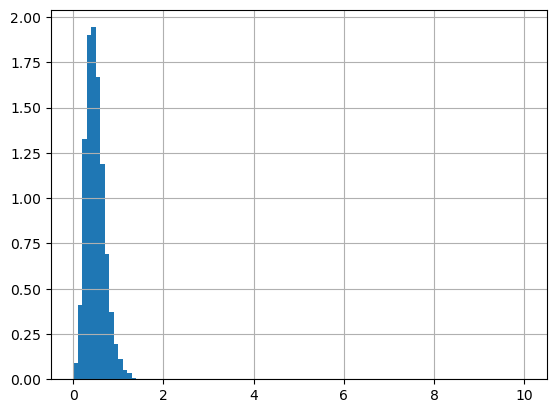

In [35]:
x,y,_ = plt.hist(arr_max, bins = 100, range = (0,10), density = True)
plt.grid()

<Axes: ylabel='Probability'>

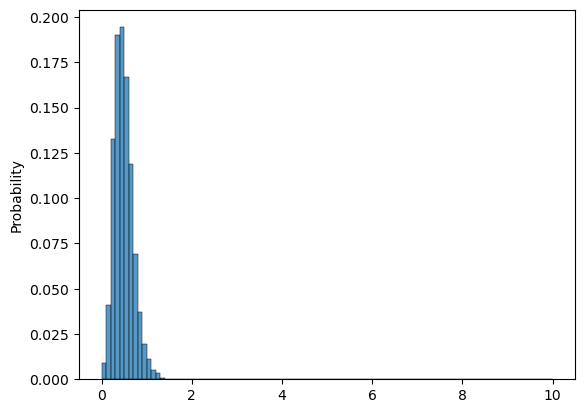

In [39]:
histplot(arr_max, bins = 100, binrange = (0,10), stat = 'probability')